In [3]:
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

img_width=150
img_height=150
batch_size=20
model=keras.applications.MobileNet(weights="imagenet",include_top=False,
input_shape=(img_height,	img_width,	3))
#	Freeze	all	lower	layers		
for	layer	in	model.layers:
    layer.trainable	=	False
    #	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)
x	=	keras.layers.Dense(64,	activation="relu")(x)
x	=	keras.layers.Dropout(0.2)(x)

output	=	keras.layers.Dense(1,	activation="sigmoid")(x)
print(model.summary())	
model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
model_final.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\usama\anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 4s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________

In [6]:
train_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	shear_range=0.2,		
zoom_range=0.2,	horizontal_flip=True)	
#	no	augmentation	for	testing:	rescaling	only	
valid_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)
test_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'./data/train',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	valid_datagen.flow_from_directory(	
								'./data/valid',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	


test_generator	=	test_datagen.flow_from_directory(	
						'./data/test',		#	directory	with	training	data	
target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
color_mode="rgb",	
batch_size=batch_size,
shuffle=False,	
class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	

Found 546 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
history	=model_final.fit_generator(	
train_generator,	
steps_per_epoch=2000	//	batch_size,	
								epochs=10,	
validation_data=valid_generator,	
validation_steps=2000	//	batch_size
)	

test_loss, test_acc=model_final.evaluate_generator(test_generator)

Epoch 1/10
100/100 [==============================] - 78s 778ms/step - loss: 1.2604 - acc: 0.7176 - val_loss: 2.2040 - val_acc: 0.4990
Epoch 2/10
100/100 [==============================] - 71s 710ms/step - loss: 0.5332 - acc: 0.7957 - val_loss: 0.6733 - val_acc: 0.6500
Epoch 3/10
100/100 [==============================] - 71s 711ms/step - loss: 0.3652 - acc: 0.8729 - val_loss: 1.0030 - val_acc: 0.6010
Epoch 4/10
100/100 [==============================] - 70s 700ms/step - loss: 0.3279 - acc: 0.8795 - val_loss: 1.8814 - val_acc: 0.5995
Epoch 5/10
100/100 [==============================] - 71s 708ms/step - loss: 0.2942 - acc: 0.9069 - val_loss: 5.1355 - val_acc: 0.5845
Epoch 6/10
100/100 [==============================] - 71s 708ms/step - loss: 0.2386 - acc: 0.9223 - val_loss: 2.6164 - val_acc: 0.6500
Epoch 7/10
100/100 [==============================] - 70s 700ms/step - loss: 0.2809 - acc: 0.9219 - val_loss: 1.8072 - val_acc: 0.5995
Epoch 8/10
100/100 [==============================] - 7

In [8]:
print("[INFO] accuracy: {:.2f}%".format(test_acc * 100)) 
print("[INFO] Loss: ",test_loss)

[INFO] accuracy: 59.29%
[INFO] Loss:  3.2248578582491194


In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model_final.predict_generator(test_generator)
y_pred = np.rint(predictions)
y_true = test_generator.classes

In [10]:
confmat=confusion_matrix(y_true, y_pred)
print('Classification Report')
y_test=y_true
target_names=['COVID_NO','COVID_YES']
print(classification_report(y_test, y_pred, target_names=target_names))

ac= accuracy_score(y_test,y_pred)
print(ac)

Classification Report
              precision    recall  f1-score   support

    COVID_NO       0.60      0.54      0.57        70
   COVID_YES       0.58      0.64      0.61        70

    accuracy                           0.59       140
   macro avg       0.59      0.59      0.59       140
weighted avg       0.59      0.59      0.59       140

0.5928571428571429


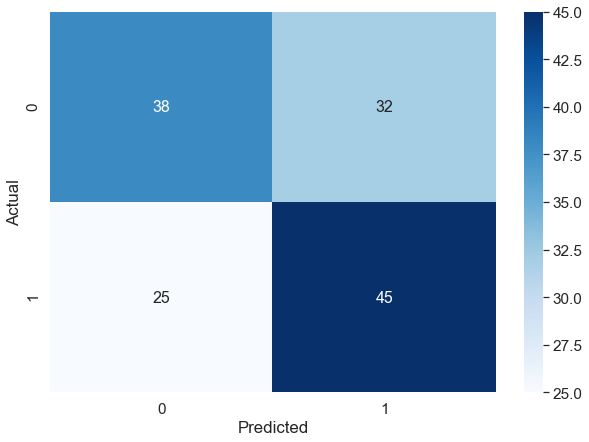

In [11]:
import seaborn as sn
cm=confmat
y_test=y_true
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt='g',annot_kws={"size": 16})
plt.savefig('mobileNET_cf')#

In [12]:
model_final.save('mobilenet-trained-weights.h5')